# Introducing the heart cells

In short a cell is an object that contains two different compartments separated by a wall. We usually refer the the inside of the cell as the intracellular space, the outside of the cell as the extracellular space and the wall separating the two compartments as the cell membrane.

Ions flow in and out of the cell through channels, usually refferred to as ion channels. These channels can be open of closed depending of different mechanicsms that we will get to. Example of ions that flow between the extracellular and intracellular space are sodium ($Na^+$), potassium ($K^+$), Calcium ($Ca^{2+})$ and many more.

Because the ions are charged there it is possible that the net charge of the intracellular space is different from the charge of the extracellular space. This results in a gradient which will try to balance the charge in a way that charge of intracellular and extracellular space becomes the same. 

At the same time the concentrations of the different ions might also differ between the intracellular and extracellular space. This in turn will result in a another gradient that will try to balance the consentration.

It should therefore be clear that we have two driving forces, one for the charge and another for the concentration that battles in order to equlize the charge and concentration respectively between the intracellular and extracellular space. This battle usually results in a comprimise between the two driving forces which sets up a potential difference between the intracellular and extracellular space. This potential difference is called the *membrane potential*, because it is the potential difference over the membrane. 

Some of these ion channels respond to changes in the membrane potential, and such channels are called *voltage-gated channels*. For example the sodium channel opens when the membrane potential reaches a certain threshold which allows sodium to flow into the cell. This will further create an unbalance which will make the membrane potiental go sky high. This is reffered to as the *upstroke*. Luckiliy there are other channels that open and close in response to changes in the membrane potential that will force the membrane potiential down agains. For example voltage-gated calcium channels allows calium to flow into the cell since the concentration of calcium in the extracellular space is much greater than in the intracellular space. This increased concentration of calcium inside the cell is what ultimately results in the cell contraction. 

There are different types of cells in the heart. In some cells the membrane potiental changes spontanoulsy, and we usually refer to these cells as pacemaker cells. Other types of cells can only fire when stimulated by an electric signal. 

In the heart the cells are connected and the action potential will travel from one cell to the next. In this way, the pacemaker cells can trigger an electric wave which traveles through the whole heart and thereby changes the membrane potential of all the cells in the heart. 

In [2]:
import utils
import matplotlib.pyplot as plt
model_name = "tentusscher_noble_noble_panfilov_2006_c"
model = utils.load_model(model_name, rebuild=False)

Loaded ODE model 'tentusscher_noble_noble_panfilov_2006_c' with:
     Num full states: 17
      Num parameters: 46


In [31]:
dt = 0.1
t_start = 0.0
t_end = 1000.0
t, u = model.solve(t_start=t_start, t_end=t_end, dt=dt)

In [32]:
# Membrane potential
V = u[:, model.state_index("V")]

In [33]:
# Intracellular sodium concentration
Na_i = u[:, model.state_index("Na_i")]

In [34]:
# Intracellular calcium concentration
Ca_i = u[:, model.state_index("Ca_i")]

In [35]:
# Sodium current
i_Na = model.monitor_single("i_Na", u, t)

In [36]:
# Calcium current
i_CaL = model.monitor_single("i_CaL", u, t)

<IPython.core.display.Javascript object>


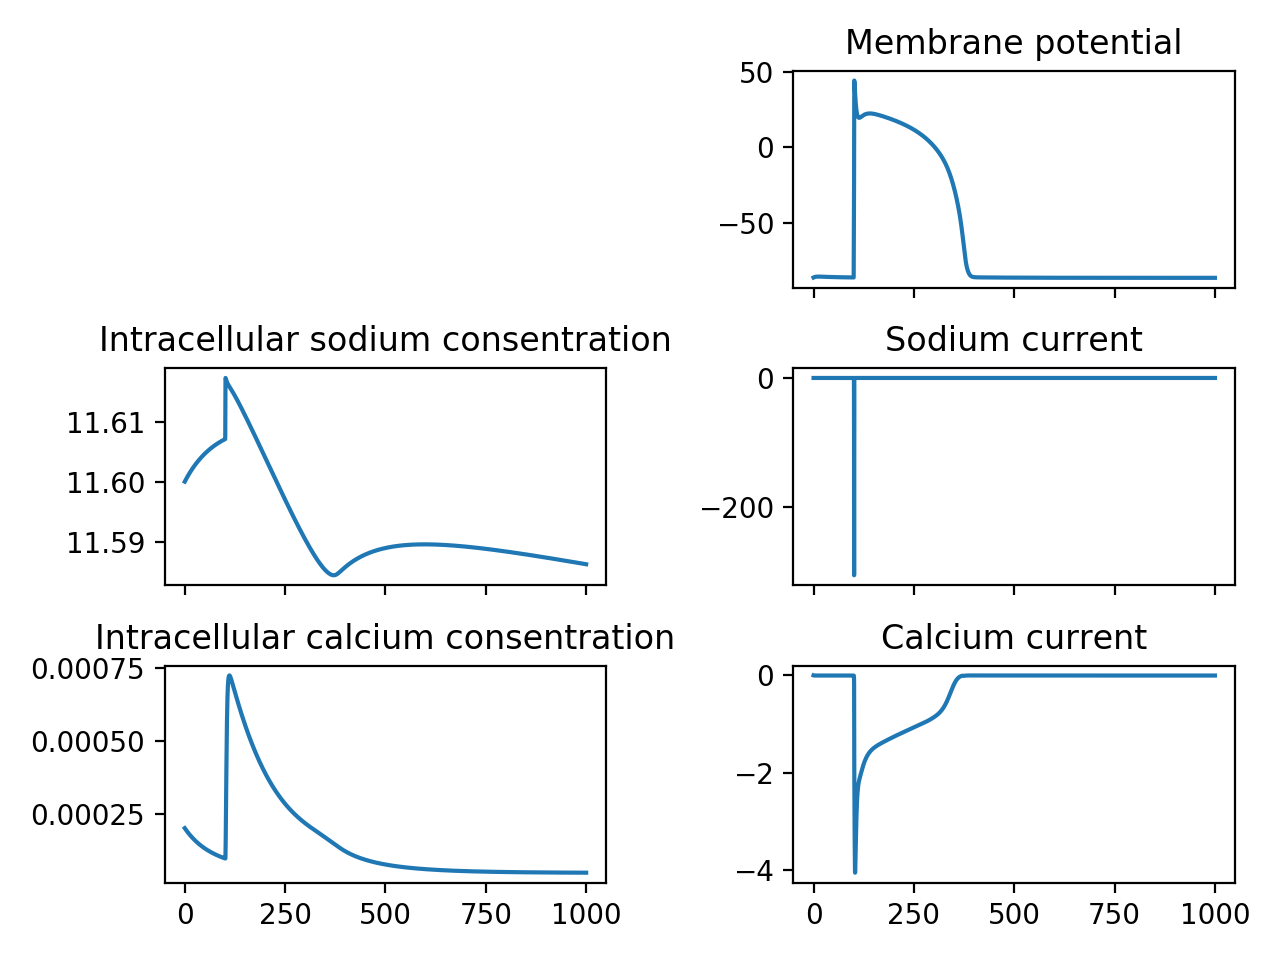

In [37]:
%matplotlib notebook
fig, ax = plt.subplots(3, 2, sharex=True)
ax[0, 0].set_axis_off()
ax[0, 1].plot(t, V)
ax[0, 1].set_title("Membrane potential")
ax[1, 0].plot(t, Na_i)
ax[1, 0].set_title("Intracellular sodium consentration")
ax[1, 1].plot(t, i_Na)
ax[1, 1].set_title("Sodium current")
ax[2, 0].plot(t, Ca_i)
ax[2, 0].set_title("Intracellular calcium consentration")
ax[2, 1].plot(t, i_CaL)
ax[2, 1].set_title("Calcium current")
fig.tight_layout()
plt.show()